In [101]:
#importing modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [102]:
#loading data into pandas dataframe
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [103]:
#EDA (569 rows and 32 columns)
df.shape

(569, 32)

In [104]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [105]:
#checking for missing values
df.isnull().sum() #no missing values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [106]:
#checking for duplicate values on ID column
df.duplicated(subset='id').sum() #no duplicates

0

In [107]:
#drop id column since it contains no duplicates
df.drop(['id'], axis=1, inplace=True)

In [108]:
#target,labels, and features
target = 'diagnosis'
labels = ['Benign', 'Malignant']
features = [i for i in df.columns.values if i not in [target]]
original_df = df.copy(deep = True)


In [109]:
#descriptive statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


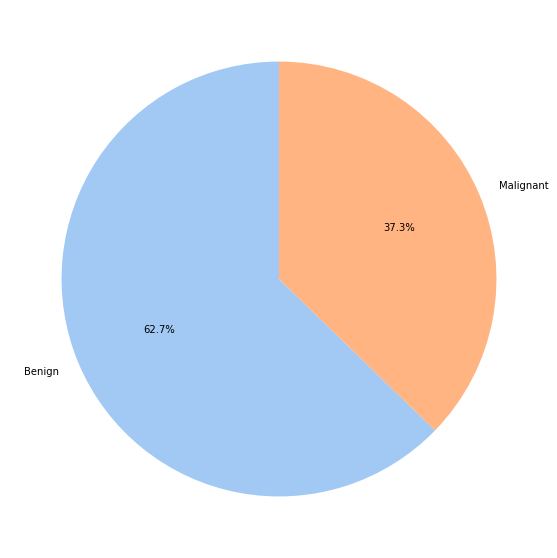

In [110]:
#Visualization pie chart showing malignant or benign 
colors = sns.color_palette('pastel')[0:2]
plt.figure(figsize=(10,10))
plt.pie(df[target].value_counts(), labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)
plt.show()
#most are benign



In [111]:
#label encoding
from sklearn.preprocessing import LabelEncoder

#creating a label encoder object
enc = LabelEncoder()

#convert diagnosis column to numerical values
df['diagnosis'] = enc.fit_transform(df['diagnosis'])

#display the updated dataframe
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [112]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

#creating a one hot encoder object
enc2 = OneHotEncoder()
#passing diagnosis column to enc2
enc_df = pd.DataFrame(enc2.fit_transform(df[['diagnosis']]).toarray())

#merge with main df on key values
df = df.join(enc_df)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,0,1
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0,1.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0,1.0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0,1.0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0,1.0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0,1.0
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0,1.0
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0,1.0
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0,1.0


In [113]:
#x and y
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [114]:
#train test split
from sklearn.model_selection import train_test_split

#creating train and test data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((455, 32), (114, 32), (455,), (114,))

In [115]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(xtrain, ytrain)
lg.predict(xtest)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [116]:
#ytest values
ytest.values

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [117]:
#score logistic regression model
lg.score(xtest, ytest)

1.0

In [118]:
#classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Logistic Regression Model Accuracy: ", lg.score(xtest, ytest) * 100, "%")
lg_predict = lg.predict(xtest)

#confusion matrix report
print("\nConfusion Matrix: ")
print(confusion_matrix(ytest, lg_predict))

#classification report
print("\nClassification Report: ")
print(classification_report(ytest, lg_predict))

Logistic Regression Model Accuracy:  100.0 %

Confusion Matrix: 
[[67  0]
 [ 0 47]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [119]:
#knn
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors= 10)
kn.fit(xtrain, ytrain)
kn.score(xtest, ytest)


0.9649122807017544

In [120]:
#knn classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#model accuracy
print("KNN Model Accuracy: ", kn.score(xtest, ytest) * 100, "%")

#prediction values
kn_predict = kn.predict(xtest)

#confusion matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(ytest, kn_predict))

#classification report
print("\nClassification Report: ")
print(classification_report(ytest, kn_predict))



KNN Model Accuracy:  96.49122807017544 %

Confusion Matrix: 
[[66  1]
 [ 3 44]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [121]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
dt.score(xtest, ytest)


1.0

In [122]:
#decision tree classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#model accuracy
print("Decision Tree Model Accuracy: ", dt.score(xtest, ytest) * 100, "%")

#predict values
dt_predict = dt.predict(xtest)

#confusion matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(ytest, dt_predict))

#classification report
print("\nClassification Report: ")
print(classification_report(ytest, dt_predict))

Decision Tree Model Accuracy:  100.0 %

Confusion Matrix: 
[[67  0]
 [ 0 47]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [123]:
#SVM Classifier
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(xtrain, ytrain)
svm.score(xtest, ytest)

1.0

In [124]:
#svm classification report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#model accuracy
print("SVM Model Accuracy: ", svm.score(xtest, ytest) * 100, "%")

#predict values
svc_predict = svm.predict(xtest)

#confusion matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(ytest, svc_predict))

#classification report
print("\nClassification Report: ")
print(classification_report(ytest, svc_predict))

SVM Model Accuracy:  100.0 %

Confusion Matrix: 
[[67  0]
 [ 0 47]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [125]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)
rf.score(xtest, ytest)

1.0

In [126]:
#Random Forest classification report

#model accuracy
print("Random Forest Model Accuracy: ", rf.score(xtest, ytest) * 100, "%")
rf_predict = rf.predict(xtest)

#confusion matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(ytest, rf_predict))

#classification report
print("\nClassification Report: ")
print(classification_report(ytest, rf_predict))

Random Forest Model Accuracy:  100.0 %

Confusion Matrix: 
[[67  0]
 [ 0 47]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

